In [ ]:
# pip install geopandas

In [ ]:
# pip install basemap


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from mpl_toolkits.basemap import Basemap

In [ ]:
url1 = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/volcano.csv'
url2 = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv'
data = pd.read_csv(url1)
df = pd.read_csv(url2)
pd.options.display.max_columns = 100

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   volcano_number            958 non-null    int64  
 1   volcano_name              958 non-null    object 
 2   primary_volcano_type      958 non-null    object 
 3   last_eruption_year        958 non-null    object 
 4   country                   958 non-null    object 
 5   region                    958 non-null    object 
 6   subregion                 958 non-null    object 
 7   latitude                  958 non-null    float64
 8   longitude                 958 non-null    float64
 9   elevation                 958 non-null    int64  
 10  tectonic_settings         958 non-null    object 
 11  evidence_category         958 non-null    object 
 12  major_rock_1              958 non-null    object 
 13  major_rock_2              958 non-null    object 
 14  major_rock

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11178 entries, 0 to 11177
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   volcano_number          11178 non-null  int64  
 1   volcano_name            11178 non-null  object 
 2   eruption_number         11178 non-null  int64  
 3   eruption_category       11178 non-null  object 
 4   area_of_activity        4694 non-null   object 
 5   vei                     8272 non-null   float64
 6   start_year              11177 non-null  float64
 7   start_month             10985 non-null  float64
 8   start_day               10982 non-null  float64
 9   evidence_method_dating  9898 non-null   object 
 10  end_year                4332 non-null   float64
 11  end_month               4329 non-null   float64
 12  end_day                 4326 non-null   float64
 13  latitude                11178 non-null  float64
 14  longitude               11178 non-null

In [ ]:
new = pd.merge(df,data,how='inner',on=['volcano_number','volcano_name'])
new.head(3)

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude_x,longitude_x,primary_volcano_type,last_eruption_year,country,region,subregion,latitude_y,longitude_y,elevation,tectonic_settings,evidence_category,major_rock_1,major_rock_2,major_rock_3,major_rock_4,major_rock_5,minor_rock_1,minor_rock_2,minor_rock_3,minor_rock_4,minor_rock_5,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
0,266030,Soputan,22354,Confirmed Eruption,NaN,NaN,2020.0,3.0,23.0,Historical Observations,2020.0,4.0,2.0,1.112,124.737,Stratovolcano,2020,Indonesia,Indonesia,Sulawesi,1.112,124.737,1785,Subduction zone / Continental crust (>25 km),Eruption Observed,Andesite / Basaltic Andesite,Basalt / Picro-Basalt,,,,,,,,,4724,69991,501336,1696768
1,266030,Soputan,22293,Confirmed Eruption,NaN,3.0,2018.0,10.0,2.0,Historical Observations,2018.0,12.0,16.0,1.112,124.737,Stratovolcano,2020,Indonesia,Indonesia,Sulawesi,1.112,124.737,1785,Subduction zone / Continental crust (>25 km),Eruption Observed,Andesite / Basaltic Andesite,Basalt / Picro-Basalt,,,,,,,,,4724,69991,501336,1696768
2,266030,Soputan,22105,Confirmed Eruption,NaN,3.0,2016.0,1.0,2.0,Historical Observations,2016.0,2.0,7.0,1.112,124.737,Stratovolcano,2020,Indonesia,Indonesia,Sulawesi,1.112,124.737,1785,Subduction zone / Continental crust (>25 km),Eruption Observed,Andesite / Basaltic Andesite,Basalt / Picro-Basalt,,,,,,,,,4724,69991,501336,1696768


In [ ]:
# new.count()

In [ ]:
new[new.duplicated()]

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude_x,longitude_x,primary_volcano_type,last_eruption_year,country,region,subregion,latitude_y,longitude_y,elevation,tectonic_settings,evidence_category,major_rock_1,major_rock_2,major_rock_3,major_rock_4,major_rock_5,minor_rock_1,minor_rock_2,minor_rock_3,minor_rock_4,minor_rock_5,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km


In [ ]:
# new['primary_volcano_type'].value_counts()

In [ ]:
def combine(s):
    if not isinstance(s, str):
        return s
    s = s.replace('?', '')
    s = s.replace('Stratovolcano(es)', 'Stratovolcano')
    s = s.replace('Pyroclastic cone(s)', 'Pyroclastic cone')
    s = s.replace('Lava dome(s)', 'Lava dome')
    s = s.replace('Caldera(s)', 'Caldera')
    s = s.replace('Shield(s)', 'Shield')
    s = s.replace('Complex(es)', 'Complex')
    return s.strip().title()

new['primary_volcano_type'] = new['primary_volcano_type'].map(combine)
new['primary_volcano_type'].value_counts() 

Stratovolcano         5827
Caldera               1071
Shield                1026
Complex                730
Submarine              158
Lava Dome              157
Pyroclastic Cone       144
Subglacial             142
Pyroclastic Shield      86
Crater Rows             66
Volcanic Field          52
Fissure Vent(S)         31
Compound                30
Lava Cone               26
Maar(S)                  9
Tuff Cone(S)             4
Name: primary_volcano_type, dtype: int64

Which category of volcanoes have the highest effects on population

In [ ]:
new[['elevation']].max()

elevation    6879
dtype: int64

In [ ]:
df2 = new[['primary_volcano_type','population_within_100_km','elevation']]

In [ ]:
elevation = df2.groupby(by='primary_volcano_type').max().reset_index().sort_values(by='population_within_100_km',ascending=False).head(20)

In [ ]:
# elevation

In [ ]:
elevation2 = elevation.sort_values(by='elevation',ascending=False)

In [ ]:
# elevation2

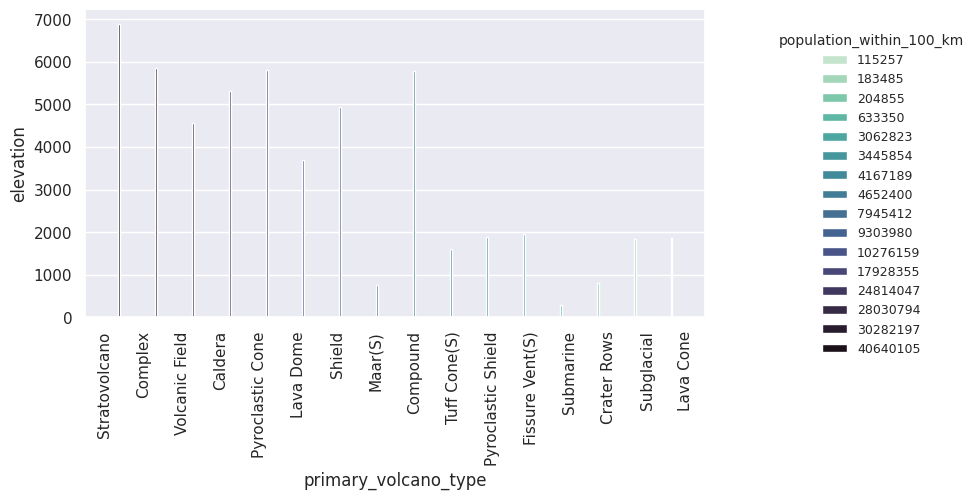

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(data=elevation,x='primary_volcano_type',y='elevation',hue='population_within_100_km',palette="mako_r")
plt.tick_params(axis='x', labelrotation = 90,direction='out')
plt.tick_params(axis='y',direction='out')
plt.legend(bbox_to_anchor=(1.10, 0.4), loc='center left',title='population_within_100_km',title_fontsize='small',frameon=False,fontsize=9)

Text(0, 0.5, 'Population Affected within 100km')

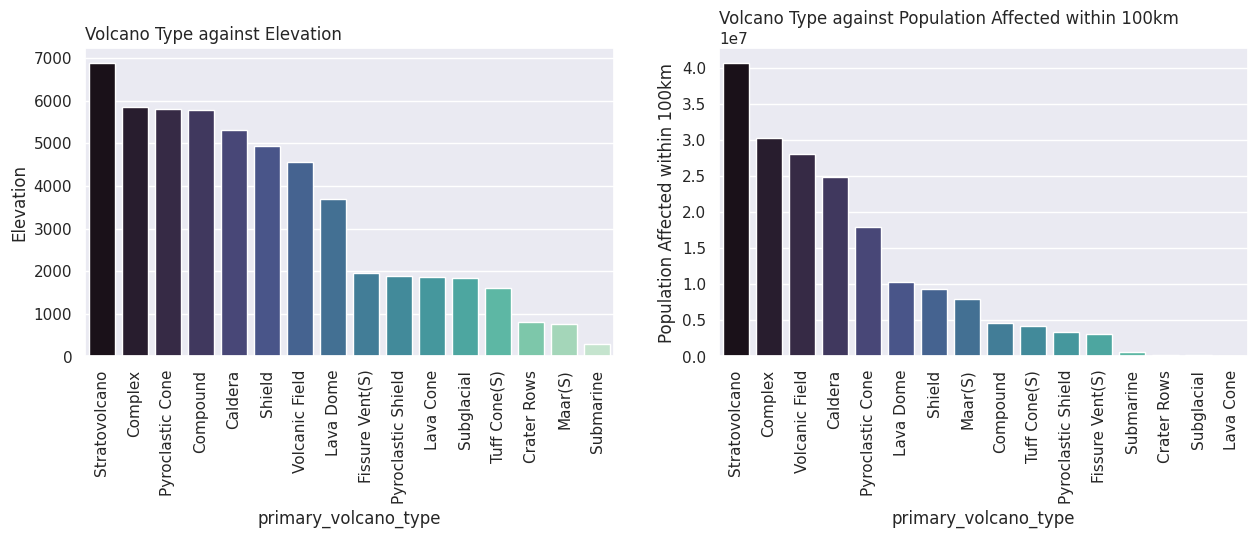

In [ ]:
sns.set(style='darkgrid')
fig,ax = plt.subplots(1,2,figsize = (15,4))
sns.barplot(data=elevation2,x='primary_volcano_type',y='elevation',palette='mako',ax=ax[0])
ax[0].tick_params(axis='x', labelrotation = 90,direction='out')
ax[0].tick_params(axis='y',direction='out')
ax[0].set_title('Volcano Type against Elevation',loc='left',fontsize=12)
ax[0].set_ylabel('Elevation')
sns.barplot(data=elevation,x='primary_volcano_type',y='population_within_100_km',palette='mako',ax=ax[1])
ax[1].tick_params(axis='x', labelrotation = 90,direction='out')
ax[1].tick_params(axis='y',direction='out')
ax[1].set_title('Volcano Type against Population Affected within 100km',loc='left',fontsize=12)
ax[1].set_ylabel('Population Affected within 100km')

Create a visualization of the tectonic plates around the globe.

In [ ]:
# new[['latitude_x','longitude_x','latitude_y','longitude_y']]

In [ ]:
gdf = gpd.GeoDataFrame(new,geometry=[Point(xy) for xy in zip(new['longitude_x'], new['latitude_x'])])

In [ ]:
gdf.head(2)

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude_x,longitude_x,primary_volcano_type,last_eruption_year,country,region,subregion,latitude_y,longitude_y,elevation,tectonic_settings,evidence_category,major_rock_1,major_rock_2,major_rock_3,major_rock_4,major_rock_5,minor_rock_1,minor_rock_2,minor_rock_3,minor_rock_4,minor_rock_5,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km,geometry
0,266030,Soputan,22354,Confirmed Eruption,NaN,NaN,2020.0,3.0,23.0,Historical Observations,2020.0,4.0,2.0,1.112,124.737,Stratovolcano,2020,Indonesia,Indonesia,Sulawesi,1.112,124.737,1785,Subduction zone / Continental crust (>25 km),Eruption Observed,Andesite / Basaltic Andesite,Basalt / Picro-Basalt,,,,,,,,,4724,69991,501336,1696768,POINT (124.73700 1.11200)
1,266030,Soputan,22293,Confirmed Eruption,NaN,3.0,2018.0,10.0,2.0,Historical Observations,2018.0,12.0,16.0,1.112,124.737,Stratovolcano,2020,Indonesia,Indonesia,Sulawesi,1.112,124.737,1785,Subduction zone / Continental crust (>25 km),Eruption Observed,Andesite / Basaltic Andesite,Basalt / Picro-Basalt,,,,,,,,,4724,69991,501336,1696768,POINT (124.73700 1.11200)


In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-138-1902369eb8ba>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 2000x500 with 0 Axes>

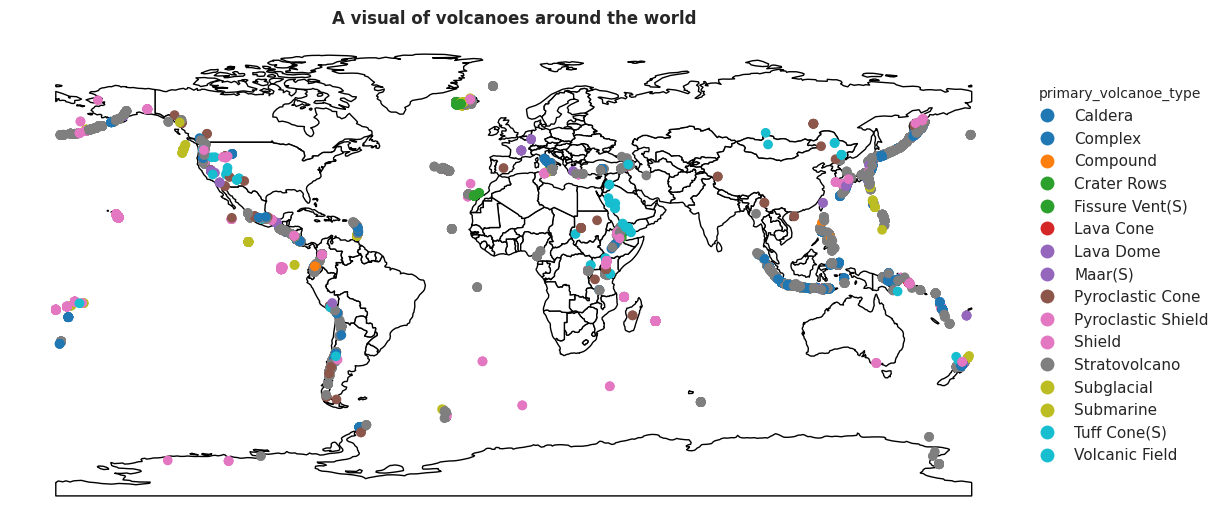

In [ ]:
plt.figure(figsize=(20,5))
ax = world.plot(color='white', edgecolor='black')
gdf.plot(column='primary_volcano_type',ax=ax,legend=True,legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5),"frameon" : False,
                                                                      "title": "primary_volcanoe_type","title_fontsize":"small"})
plt.title('A visual of volcanoes around the world',fontweight='bold')
plt.tick_params(axis='x', which='both', bottom=False,
                top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False,
                left=False, labelleft=False)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)

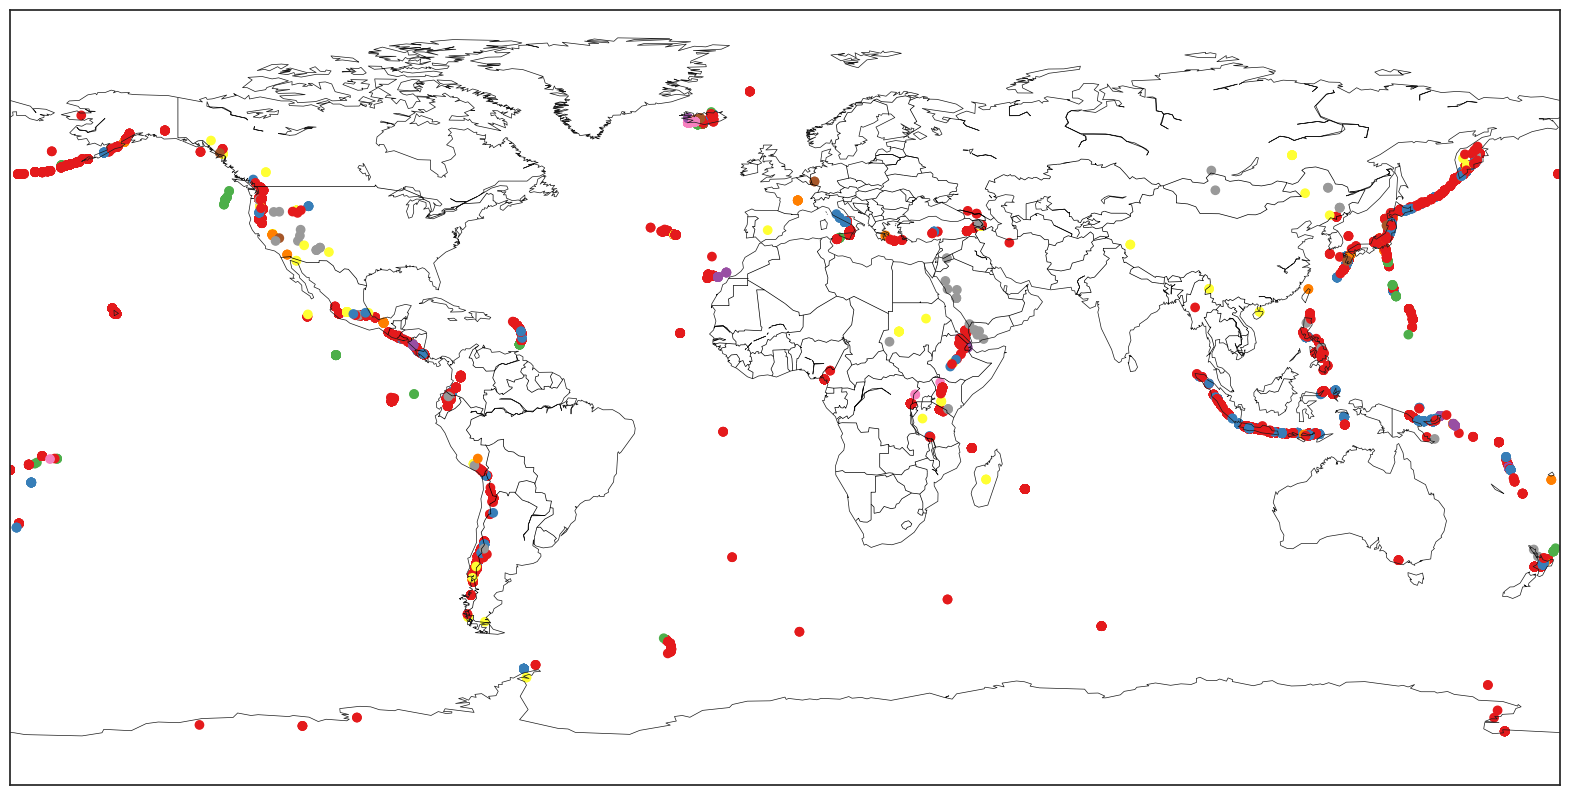

In [ ]:
from shapely import geometry
plt.figure(figsize=(20,15))
sns.set(style='white')
m = Basemap()
m.drawcoastlines(linewidth=0.5)
m.drawcountries(color='black',linewidth=0.5)

new['labels_enc'] = pd.factorize(new['primary_volcano_type'])[0]
m.scatter(x = new['longitude_x'],y = new['latitude_x'], alpha=1,c=new['labels_enc'],cmap='Set1')

***Visualize with size difference what is the distribution across the globe ***

In [ ]:
size = gdf[['region','geometry','eruption_number','eruption_category']]
size

,region,geometry,eruption_number,eruption_category
0,Indonesia,POINT (124.73700 1.11200),22354,Confirmed Eruption
1,Indonesia,POINT (124.73700 1.11200),22293,Confirmed Eruption
2,Indonesia,POINT (124.73700 1.11200),22105,Confirmed Eruption
3,Indonesia,POINT (124.73700 1.11200),20988,Confirmed Eruption
4,Indonesia,POINT (124.73700 1.11200),20821,Confirmed Eruption
...,...,...,...,...
9554,Canada and Western USA,POINT (-108.83000 34.25000),22196,Confirmed Eruption
9555,Canada and Western USA,POINT (-108.83000 34.25000),22194,Confirmed Eruption
9556,Canada and Western USA,POINT (-108.83000 34.25000),22193,Confirmed Eruption
9557,"Japan, Taiwan, Marianas",POINT (139.49100 36.76500),17850,Confirmed Eruption


In [ ]:
df1 = new[new['eruption_category'] == 'Confirmed Eruption']
df1.shape

(8556, 39)

In [ ]:
df1[['region','latitude_x','longitude_x']].count()

region         8556
latitude_x     8556
longitude_x    8556
dtype: int64

In [ ]:
df1.groupby('region')[['latitude_x','longitude_x']].value_counts().reset_index()

,region,latitude_x,longitude_x,0
0,Africa and Red Sea,-1.408,29.200,48
1,Africa and Red Sea,-2.764,35.914,26
2,Africa and Red Sea,-1.520,29.250,19
3,Africa and Red Sea,4.203,9.170,19
4,Africa and Red Sea,2.320,36.570,10
...,...,...,...,...
652,West Indies,17.478,-62.960,3
653,West Indies,17.370,-62.800,3
654,West Indies,15.370,-61.330,2
655,West Indies,13.830,-61.050,1


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


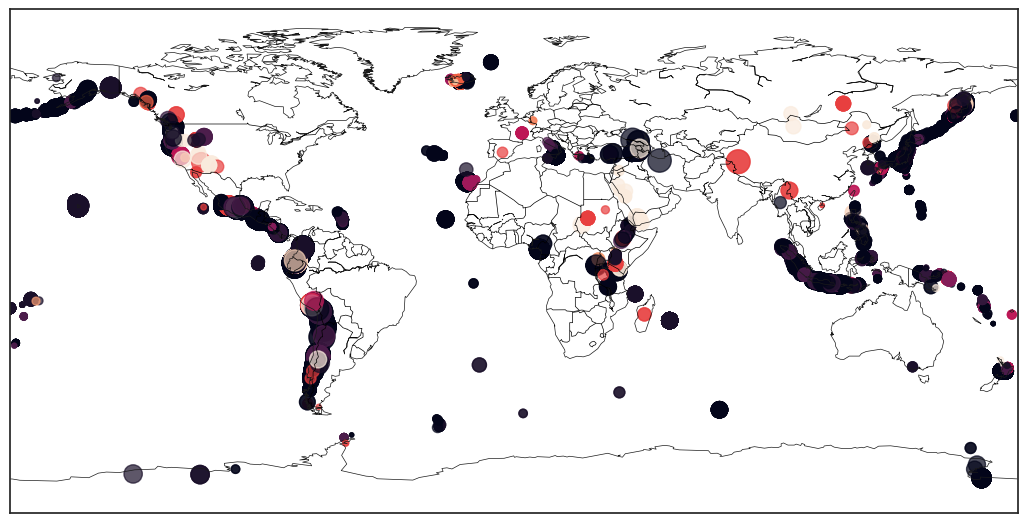

In [ ]:
sns.set(style='white')
plt.figure(figsize=(13,13))
m = Basemap()
m.drawcoastlines(linewidth=0.5)
m.drawcountries(color='black',linewidth=0.5)
gdf['labels_enc'] = pd.factorize(gdf['primary_volcano_type'])[0]
m.scatter(gdf['longitude_x'],gdf['latitude_x'],alpha=.7,s=gdf['elevation']/20,c=gdf['labels_enc'])

In [ ]:
# from shapely import geometry
# plt.figure(figsize=(20,15))
# sns.set(style='white')
# m = Basemap()
# m.drawcoastlines(linewidth=0.5)
# m.drawcountries(color='black',linewidth=0.5)

# m.scatter(data=df1,x ='longitude_x', y='latitude_x',
#                     palette='coolwarm', hue='0', linewidth=0.01)

# m.scatterplot(x = new['longitude_x'],y = new['latitude_x'], alpha=1,s=df1['region'].value_counts())

**Location of most active volcanoes since 1800**

In [ ]:
gdf.head(3)

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude_x,longitude_x,primary_volcano_type,last_eruption_year,country,region,subregion,latitude_y,longitude_y,elevation,tectonic_settings,evidence_category,major_rock_1,major_rock_2,major_rock_3,major_rock_4,major_rock_5,minor_rock_1,minor_rock_2,minor_rock_3,minor_rock_4,minor_rock_5,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km,geometry
59,233020,"Fournaise, Piton de la",14383,Confirmed Eruption,East flank of Dolomieu (1850-1540 m),2.0,2002,11,16,Historical Observations,2002.0,12.0,3.0,-21.244,55.708,Shield,2020,France,Middle East and Indian Ocean,Indian Ocean (western),-21.244,55.708,2632,Intraplate / Oceanic crust (< 15 km),Eruption Observed,Basalt / Picro-Basalt,Trachybasalt / Tephrite Basanite,,,,,,,,,55859,55859,246792,717820,POINT (55.70800 -21.24400)
60,233020,"Fournaise, Piton de la",14382,Confirmed Eruption,NE part of l'Enclos Fouqué caldera,1.0,2002,1,5,Historical Observations,2002.0,1.0,16.0,-21.244,55.708,Shield,2020,France,Middle East and Indian Ocean,Indian Ocean (western),-21.244,55.708,2632,Intraplate / Oceanic crust (< 15 km),Eruption Observed,Basalt / Picro-Basalt,Trachybasalt / Tephrite Basanite,,,,,,,,,55859,55859,246792,717820,POINT (55.70800 -21.24400)
389,282060,Kikai,17001,Confirmed Eruption,Iwo-dake,2.0,2002,5,11,Historical Observations,2002.0,7.0,16.0,30.793,130.305,Caldera,2020,Japan,"Japan, Taiwan, Marianas",Ryukyu Islands and Kyushu,30.793,130.305,704,Subduction zone / Oceanic crust (< 15 km),Eruption Observed,Rhyolite,Basalt / Picro-Basalt,Andesite / Basaltic Andesite,,,,,,,,152,152,152,1002905,POINT (130.30500 30.79300)


In [ ]:
gdf[['start_year','start_month','start_day']] = gdf[['start_year','start_month','start_day']].astype(str)

In [ ]:
gdf['start_year'] = gdf['start_year'].replace('\.0', '', regex=True)
gdf['start_month'] = gdf['start_month'].replace('\.0', '', regex=True)
gdf['start_day'] = gdf['start_day'].replace('\.0', '', regex=True)

In [ ]:
gdf['start_year'] = gdf['start_year'].map(lambda x:x.lstrip('-'))
gdf['start_month'] = gdf['start_month'].map(lambda x:x.lstrip('-'))
gdf['start_day'] = gdf['start_day'].map(lambda x:x.lstrip('-'))

In [ ]:
gdf['start_year']

0        2020
1        2018
2        2016
3        2015
4        2012
        ...  
9554     9450
9555     9700
9556     9850
9557     9540
9558    10450
Name: start_year, Length: 9559, dtype: object

In [ ]:
year = gdf[gdf['start_year'] != 'nan']
year = year[year['start_year'].astype(int) > 1800]
df2 = year.groupby('volcano_name')['eruption_number'].count().reset_index()

In [ ]:
df3 = df2.sort_values(by='eruption_number',ascending=False).head(10)
df3

,volcano_name,eruption_number
169,"Fournaise, Piton de la",152
159,Etna,125
44,Asosan,108
270,Klyuchevskoy,93
580,Villarrica,81
555,Tongariro,77
42,Asamayama,72
267,Kilauea,68
256,Katla,68
327,Marapi,67


Text(0.125, 0.94, 'Volcano names against no. of eruptions')

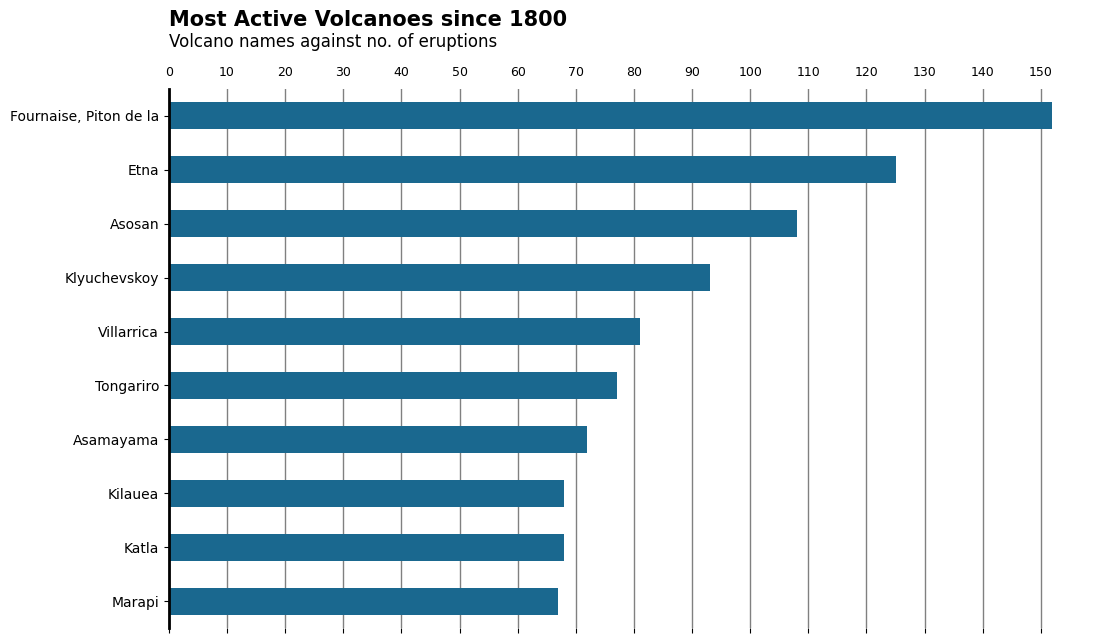

In [ ]:
fig,ax = plt.subplots(figsize=(12,7))
ax = sns.barplot(data=df3,x='eruption_number',y='volcano_name',color="#076fa2",width=.5)

ax.xaxis.set_ticks([i * 10 for i in range(0,16)])
ax.xaxis.set_ticklabels([i * 10 for i in range(0,16)],size=9)
ax.xaxis.set_tick_params(labelbottom=False,labeltop=True)

ax.set_xlim((0,160))


ax.grid(axis = "x", color="grey", lw=1)
ax.set_axisbelow(True)
# ax.spines["right"].set_visible(False)
# ax.spines["top"].set_visible(False)
# ax.spines["bottom"].set_visible(False)
sns.despine(top=True,bottom=True,right=True)
ax.spines["left"].set_lw(2)

ax.set_ylabel('')
ax.set_xlabel('')

fig.text(0.125,.97,'Most Active Volcanoes since 1800',fontsize=15,fontweight='bold')
fig.text(0.125,.94,'Volcano names against no. of eruptions',fontsize=12)



**Choose a year of your interest and plot the frequency of eruptions per month, worldwide**

In [ ]:
dist = gdf[gdf['start_month'].isin(['1','2','3','3','4','5','6','7','8','9','10','11','12'])]

In [ ]:
yr1 = dist[dist['start_year'] == '1953']
yr2 = dist[dist['start_year'] == '1968']
yr3 = dist[dist['start_year'] == '1974']
yr4 = dist[dist['start_year'] == '1991']
yr5 = dist[dist['start_year'] == '2005']
yr6 = dist[dist['start_year'] == '2015']

[Text(0.5, 1.0, 'Year 2015')]

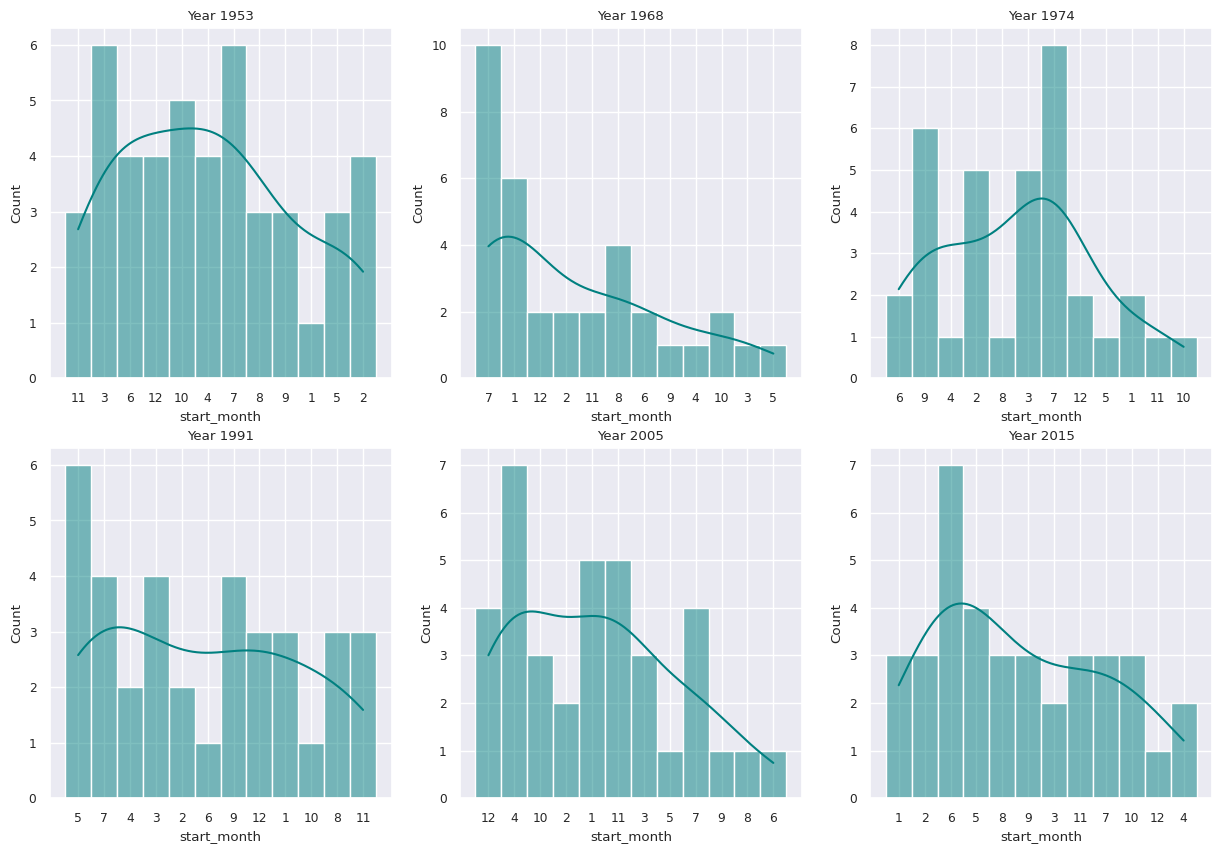

In [ ]:
sns.set(font_scale=.8)
fig,ax = plt.subplots(2,3,figsize=(15,10)) #  subplot_kw=dict(xticks=[], yticks=[])

sns.histplot(data=yr1, x='start_month', kde=True, color="teal", ax=ax[0, 0]).set(title='Year 1953')
sns.histplot(data=yr2, x='start_month', kde=True, color="teal", ax=ax[0, 1]).set(title='Year 1968')
sns.histplot(data=yr3, x='start_month', kde=True, color="teal", ax=ax[0, 2]).set(title='Year 1974')
sns.histplot(data=yr4, x='start_month', kde=True, color="teal", ax=ax[1, 0]).set(title='Year 1991')
sns.histplot(data=yr5, x='start_month', kde=True, color="teal", ax=ax[1, 1]).set(title='Year 2005')
sns.histplot(data=yr6, x='start_month', kde=True, color="teal", ax=ax[1, 2]).set(title='Year 2015')

**Distribution of Elevation per Volcano Type**

Text(0.23, 1.0, 'Elevation distribution per Volcano Type')

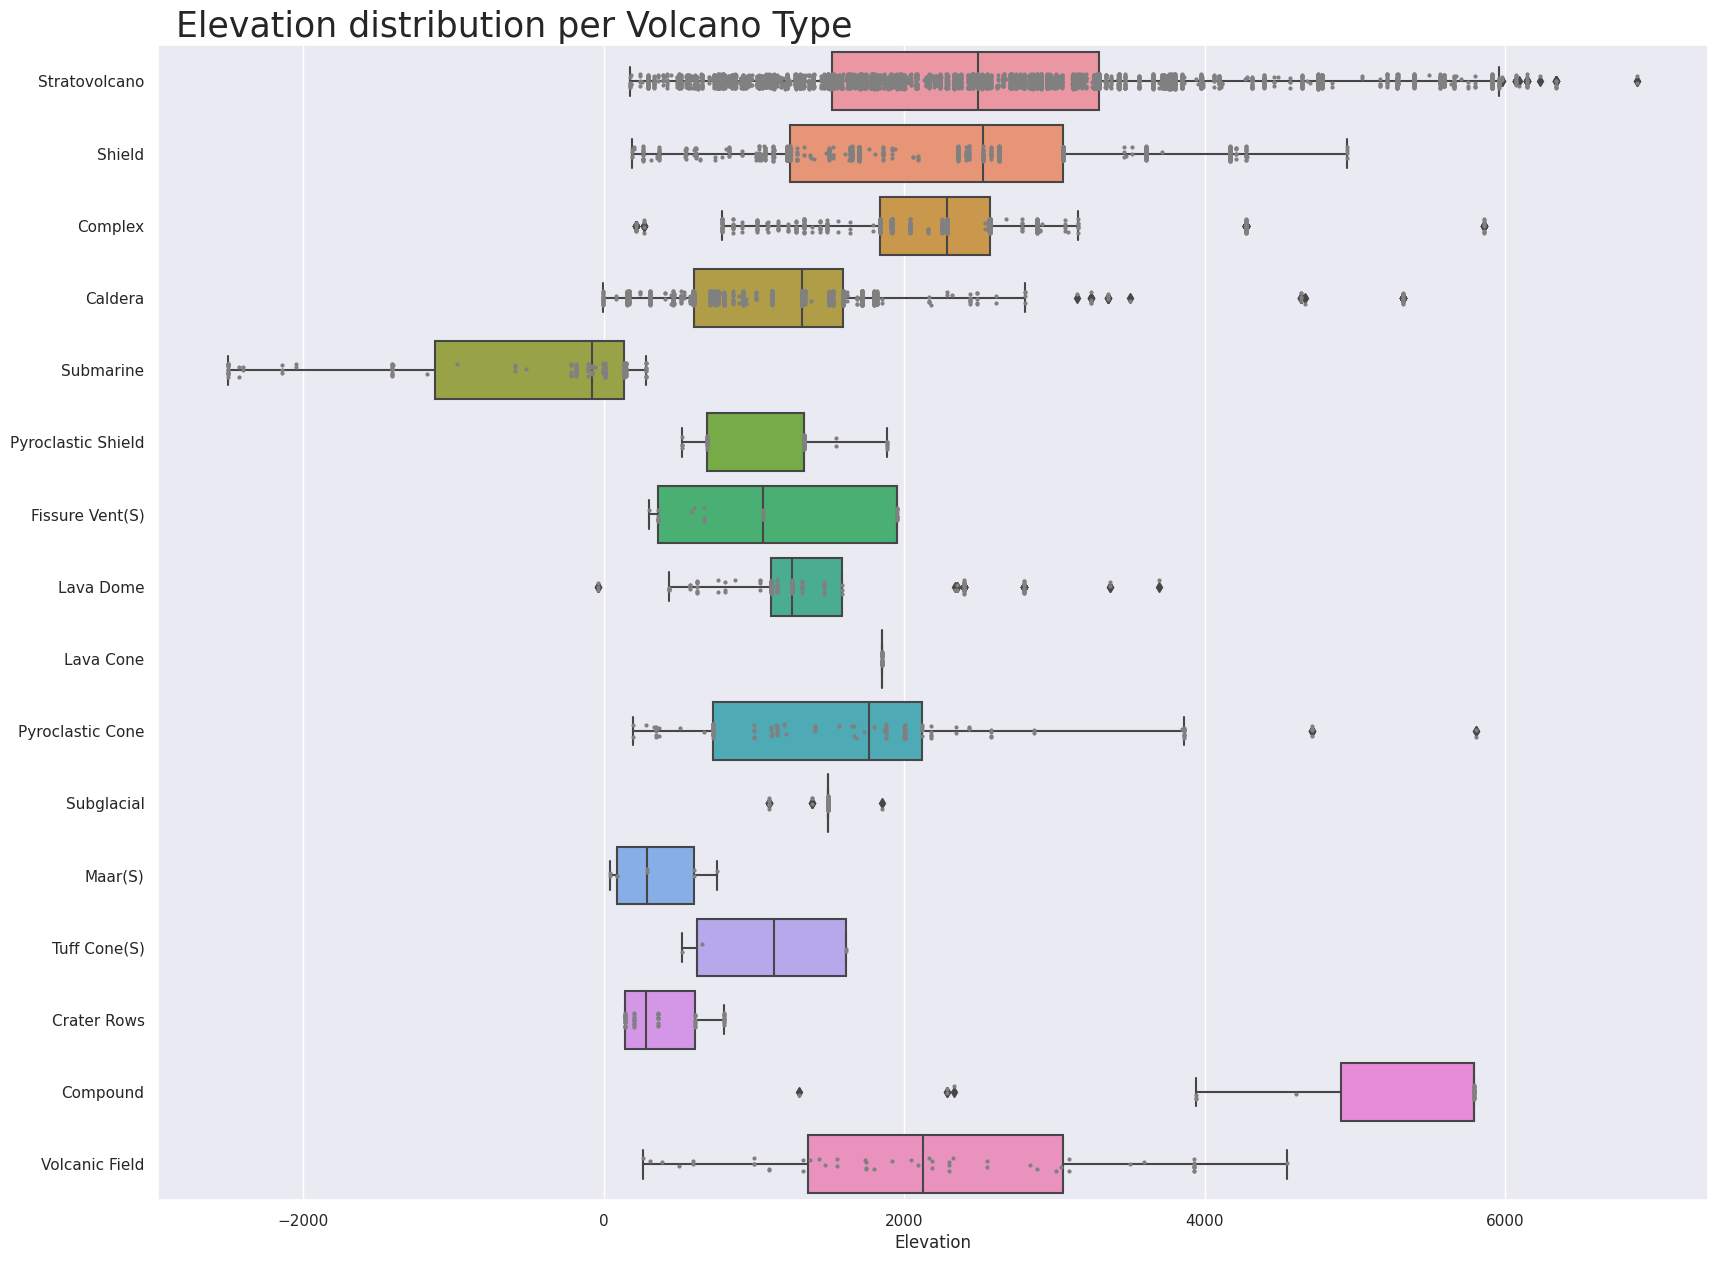

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,15))

sns.boxplot(x=new.elevation, y=new.primary_volcano_type)
sns.stripplot(x=new.elevation, y=new.primary_volcano_type,size=3,color='grey')

plt.xlabel("Elevation")
plt.ylabel("")
plt.title("Elevation distribution per Volcano Type",x=0.23, fontsize=25)